In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

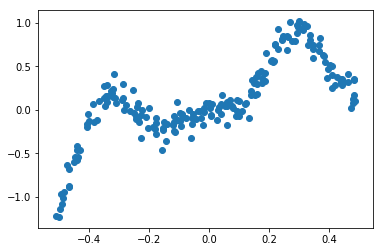

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

## Non Residual Network

In [25]:
import mylibrary.nnlib as tnn

In [26]:
optimizer = tnn.Adam(learning_rate=0.003)

n_input = 1
n_hidden = 1
n_output = 1

bias1 = tnn.BiasLayer(1, optimizer=optimizer)
drelu1 = tnn.DoubleRelu()
linear1 = tnn.LinearLayer(n_input*2, n_hidden,optimizer=optimizer)
# linear1.weights = np.zeros_like(linear1.weights)

bias2 = tnn.BiasLayer(n_hidden, optimizer=optimizer)
drelu2 = tnn.DoubleRelu()
linear2 = tnn.LinearLayer(n_hidden*2, 1,optimizer=optimizer)
# linear2.weights = np.zeros_like(linear2.weights)

net1 = tnn.AutoForm()
net1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
#     dx = net1.backward((np.sign(dy))*dy**2)
    dx = net1.backward(dy)
    
    
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.10817580163933965

_______________________
epoch 100
Loss 0.056550495191559434

_______________________
epoch 200
Loss 0.04948312339558997

_______________________
epoch 300
Loss 0.04773046011506263

_______________________
epoch 400
Loss 0.0460714791758863

_______________________
epoch 500
Loss 0.04466470053870804

_______________________
epoch 600
Loss 0.043533040686550326

_______________________
epoch 700
Loss 0.042750556364807436

_______________________
epoch 800
Loss 0.04218160373156312

_______________________
epoch 900
Loss 0.04178869087341823

_______________________
epoch 1000
Loss 0.04143626825666631

_______________________
epoch 1100
Loss 0.041160438562518

_______________________
epoch 1200
Loss 0.04094917326718196

_______________________
epoch 1300
Loss 0.04079216609500805

_______________________
epoch 1400
Loss 0.04066537580878931

_______________________
epoch 1500
Loss 0.0405164251620257

_______________________
epoch 1600
Lo


_______________________
epoch 13400
Loss 0.03986511879850265

_______________________
epoch 13500
Loss 0.0398623731054088

_______________________
epoch 13600
Loss 0.03987014701704124


TclError: invalid command name "pyimage148"

In [16]:
print('b1',bias1.bias)
print('w1',linear1.weights)
print('b2',bias2.bias)
print('w2',linear2.weights)

b1 [0.086498]
w1 [[16.76613527]
 [ 0.58692287]]
b2 [0.09003312]
w2 [[ 0.0728273 ]
 [17.61100818]]


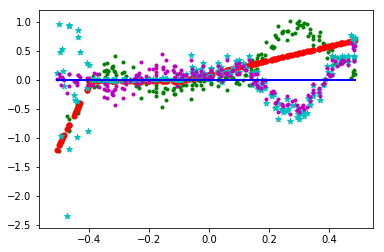

In [17]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

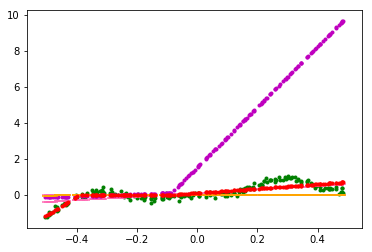

In [18]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
mask = drelu1.x >= 0.
plt.scatter(x, drelu1.output[:, 0],marker='_', c='hotpink', label='x, a1')
plt.scatter(x, drelu1.output[:, 1],marker='_', c='hotpink', label='x, a1')
plt.scatter(x, linear1.zee ,marker='.', c='m', label='x, a1')

# plt.scatter(x, drelu2.output[:, 0],marker='_', c='orange', label='x, a2')
plt.scatter(x, drelu2.output[:, 1],marker='_', c='orange', label='x, a2')
plt.scatter(x, linear2.zee ,marker='.', c='r', label='x, a2')

In [19]:
# x_new = x_data.copy()
# for i in range(1000):
#     a1_ = net1.forward(x_new)
#     loss_ = tnn.MseLoss.loss(a1_, y_data)
#     dy_ = tnn.MseLoss.del_loss(a1_, y_data)
# #     dx_ = net1.backward((np.sign(dy_))*dy_**2)
#     dx_ = net1.backward(dy_)
#     x_new = x_new - 0.1*dx_
    
    
    
# a1_ = net1.forward(x_new)
# dx_ = x_data - x_new
# plt.scatter(x, y, marker='.', c='g', label='x,y')
# plt.scatter(x, dx, marker='.', c='c', label='x,dx_')
# plt.scatter(x, dx_.reshape(-1), marker='.', c='m', lw=1, label='x,dx_')
# plt.scatter(x, a1_.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
# plt.scatter(x, a1.reshape(-1), marker='.', c='orange', lw=1, label='x,a1')

In [58]:
## Other varities of course

In [14]:
optimizer = tnn.Adam(learning_rate=0.003)

n_input = 1
n_hidden = 3
n_output = 1

bias1 = tnn.BiasLayer(1, optimizer=optimizer)
drelu1 = tnn.DoubleRelu()
linear1 = tnn.LinearLayer(n_input*2, n_hidden,optimizer=optimizer)
# linear1.weights = np.zeros_like(linear1.weights)

bias2 = tnn.BiasLayer(n_hidden, optimizer=optimizer)
drelu2 = tnn.DoubleRelu()
linear2 = tnn.LinearLayer(n_hidden*2, 1,optimizer=optimizer)
# linear2.weights = np.zeros_like(linear2.weights)

net1 = tnn.AutoForm()
net1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
#     dx = net1.backward((np.sign(dy))*dy**2)
    dx = net1.backward(dy)
    
    
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.16124420310813775

_______________________
epoch 100
Loss 0.052960716929233174

_______________________
epoch 200
Loss 0.041817525261611976

_______________________
epoch 300
Loss 0.03452470598586115

_______________________
epoch 400
Loss 0.025387438635164097

_______________________
epoch 500
Loss 0.020667988377554156

_______________________
epoch 600
Loss 0.017307517359197132

_______________________
epoch 700
Loss 0.014878725014205747

_______________________
epoch 800
Loss 0.012997656675498898

_______________________
epoch 900
Loss 0.01141382672056373

_______________________
epoch 1000
Loss 0.00997955126759052

_______________________
epoch 1100
Loss 0.008903474466110842

_______________________
epoch 1200
Loss 0.008101786958610569

_______________________
epoch 1300
Loss 0.007553513759750798

_______________________
epoch 1400
Loss 0.007217990691186668

_______________________
epoch 1500
Loss 0.007022546819852665

_______________________


TclError: this isn't a Tk application

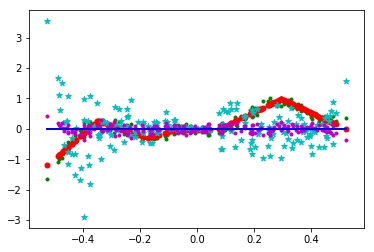

In [15]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [16]:
# Multilayer Perceptron using Double Relu

In [27]:
optimizer = tnn.Adam(learning_rate=0.003)

n_input = 1
n_hidden = 7
n_output = 1

linear1 = tnn.LinearLayer(1, n_hidden, optimizer=optimizer)
bias1 = tnn.BiasLayer(n_hidden, optimizer=optimizer)
drelu1 = tnn.DoubleRelu()

linear2 = tnn.LinearLayer(n_hidden*2, 1,optimizer=optimizer)
# linear2.weights = np.zeros_like(linear2.weights)

net1 = tnn.AutoForm()
net1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
#     dx = net1.backward((np.sign(dy))*dy**2)
    dx = net1.backward(dy)
    
    
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.07685816100809742

_______________________
epoch 100
Loss 0.04299249924191338

_______________________
epoch 200
Loss 0.03937592555838122

_______________________
epoch 300
Loss 0.0331008383671596

_______________________
epoch 400
Loss 0.024635237772593875

_______________________
epoch 500
Loss 0.016407292621912914

_______________________
epoch 600
Loss 0.010903772762146767

_______________________
epoch 700
Loss 0.008075698524936508

_______________________
epoch 800
Loss 0.006851982973567891

_______________________
epoch 900
Loss 0.006362475428835009

_______________________
epoch 1000
Loss 0.006000804505240349

_______________________
epoch 1100
Loss 0.005849249141302303

_______________________
epoch 1200
Loss 0.005777865450496784

_______________________
epoch 1300
Loss 0.005742384263879947

_______________________
epoch 1400
Loss 0.005725802264641113

_______________________
epoch 1500
Loss 0.005717515502544993

_______________________
e

TclError: this isn't a Tk application

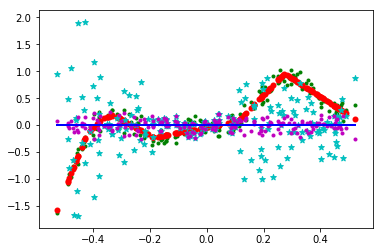

In [28]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)